In [25]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

import torch.nn as nn
import torch.optim as optim
import os
import gzip


# T-SNE

In [2]:
# 직접 불러오기
path = os.getcwd()  # 현재경로
labels_path = os.path.join(path,'data\\FashionMNIST','raw','%s-labels-idx1-ubyte.gz'%'train')
images_path = os.path.join(path,'data\\FashionMNIST','raw','%s-images-idx3-ubyte.gz'%'train')

with gzip.open(labels_path, 'rb') as lbpath:       # .gz파일 압축해제 & offset은 데이터의 시작위치
    y = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)

with gzip.open(images_path, 'rb') as imgpath:
    X = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(y), 28,28)


In [16]:
X.shape , y.shape

((60000, 28, 28), (60000,))

In [30]:
from sklearn.manifold import TSNE

X = X[:5000]
y = y[:5000]
X=X.reshape(-1,28*28)

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
model = TSNE(n_components=n_components , perplexity = 40 , learning_rate=400.0 , n_iter=2000)

# 학습한 결과 2차원 공간 값 출력
t_sne = model.fit_transform(X)

c:\Users\minki\miniconda3\envs\dl_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


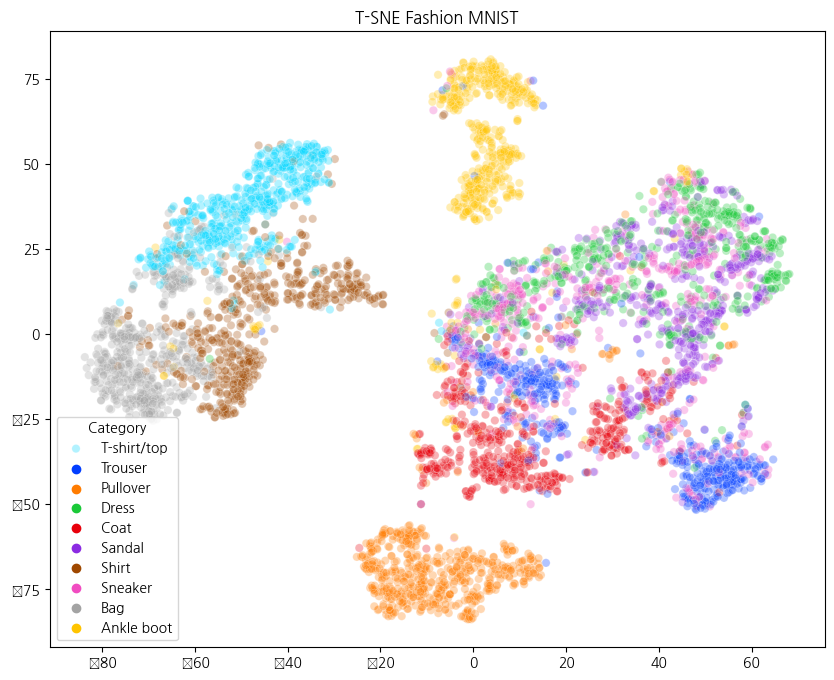

In [33]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=t_sne[:, 0], y=t_sne[:, 1], hue=y, palette='bright', alpha=0.3)
plt.title('T-SNE Fashion MNIST')
plt.legend(title='Category', loc='best', labels=labels)
plt.show()